In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv(r'C:\Users\sankr\Desktop\BostonHousePricePrediction\notebook\data\raw.csv')

Preparing X and Y variables

In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
num_features = X.select_dtypes(exclude="object").columns
print(num_features)
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')


In [7]:
X = preprocessor.fit_transform(X)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

Create an Evaluate Function to give all metrics after model Training

In [9]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')
    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 4.4675
- Mean Absolute Error: 3.1036
- R2 Score: 0.7645
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2150
- Mean Absolute Error: 3.6099
- R2 Score: 0.6734


Lasso
Model performance for Training set
- Root Mean Squared Error: 5.1031
- Mean Absolute Error: 3.5663
- R2 Score: 0.6928
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.7798
- Mean Absolute Error: 3.9652
- R2 Score: 0.5988


Ridge
Model performance for Training set
- Root Mean Squared Error: 4.4676
- Mean Absolute Error: 3.1001
- R2 Score: 0.7645
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.2199
- Mean Absolute Error: 3.6100
- R2 Score: 0.6728


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 3.6759
- Mean Absolute Error: 2.2347
- R2 Score: 0.8406
-----------------------

In [11]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.849941
5,Random Forest Regressor,0.822115
7,CatBoosting Regressor,0.790281
8,AdaBoost Regressor,0.753268
4,Decision Tree,0.696594
0,Linear Regression,0.673383
2,Ridge,0.672764
3,K-Neighbors Regressor,0.666041
1,Lasso,0.598794


In [12]:
model = XGBRegressor(fit_intercept=True)
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 84.99


Text(0, 0.5, 'Predicted')

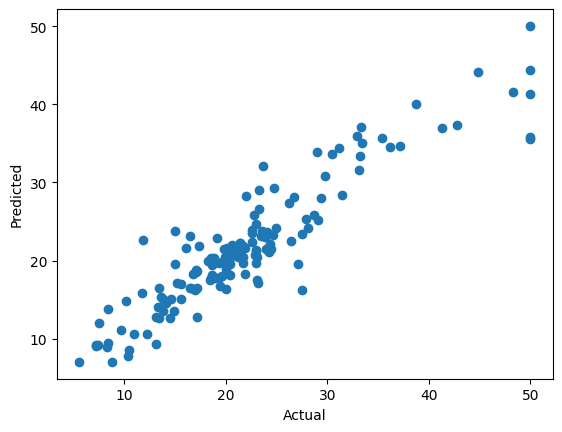

In [14]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='Price'>

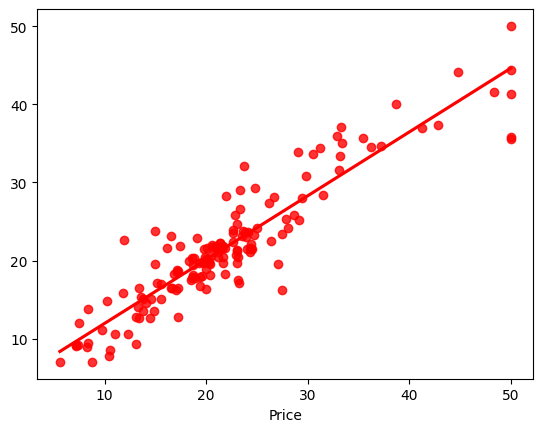

In [15]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

Difference Between Actual and Predicted Values

In [16]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
329,22.6,23.907167,-1.307167
371,50.0,35.806198,14.193802
219,23.0,21.243382,1.756618
403,8.3,8.920815,-0.620815
78,21.2,21.127504,0.072496
...,...,...,...
4,36.2,34.505676,1.694324
428,11.0,10.634255,0.365745
385,7.2,9.005723,-1.805723
308,22.8,25.828186,-3.028186


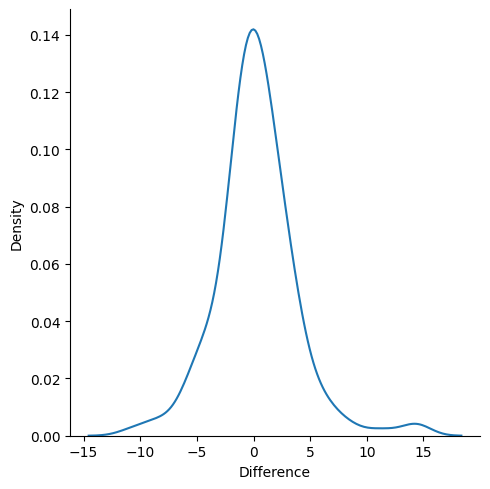

In [20]:
sns.displot(pred_df['Difference'], kind = "kde")

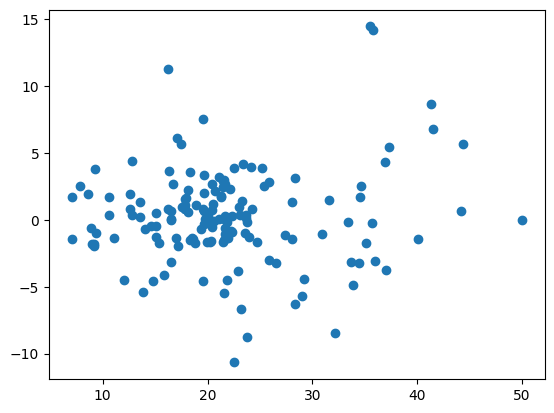

In [21]:
plt.scatter(y_pred, pred_df['Difference'])